### 1) Problem identification:
##### The dataset lacks AQI and pollutant index values, making it unsuitable for air quality prediction. The primary problem identified is the need to calculate missing indices (SOI, NOI, PM2.5i,spmi an rspmi) and AQI using conditional logic to develop and compare regression and classification machine learning models to predict air quality levels and evaluate their performance using R²-score and accuracy.

### 2) import libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 3) load dataset

In [7]:
df=pd.read_csv(r"C:\Users\navee\OneDrive\Documents\AQI dataset.csv",encoding="unicode_escape")

## 4) Data Understanding

In [9]:
df.head(5)

,state,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,4.8,17.4,NaN,NaN,NaN,01-02-1990
1,Andhra Pradesh,3.1,7.0,NaN,NaN,NaN,01-02-1990
2,Andhra Pradesh,6.2,28.5,NaN,NaN,NaN,01-02-1990
3,Andhra Pradesh,6.3,14.7,NaN,NaN,NaN,01-03-1990
4,Andhra Pradesh,4.7,7.5,NaN,NaN,NaN,01-03-1990


In [10]:
df.shape

(435742, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   state   435742 non-null  object 
 1   so2     401096 non-null  float64
 2   no2     419509 non-null  float64
 3   rspm    395520 non-null  float64
 4   spm     198355 non-null  float64
 5   pm2_5   9314 non-null    float64
 6   date    435735 non-null  object 
dtypes: float64(5), object(2)
memory usage: 23.3+ MB


In [12]:
df["state"].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [13]:
df.isnull().sum()

state         0
so2       34646
no2       16233
rspm      40222
spm      237387
pm2_5    426428
date          7
dtype: int64

## 5) Data Visualisation

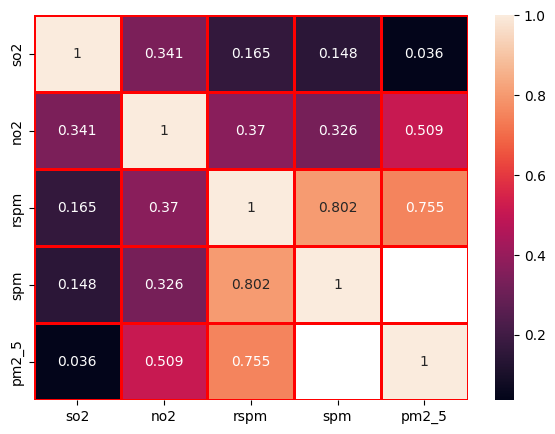

In [15]:
#checking correlation through heatmap
plt.figure(figsize=(7,5))
numeric_data=df.select_dtypes(include=['int64','float64'])
sns.heatmap(data=numeric_data.corr(),annot=True,linecolor='red',linewidths=2,fmt='.3g')
plt.show()

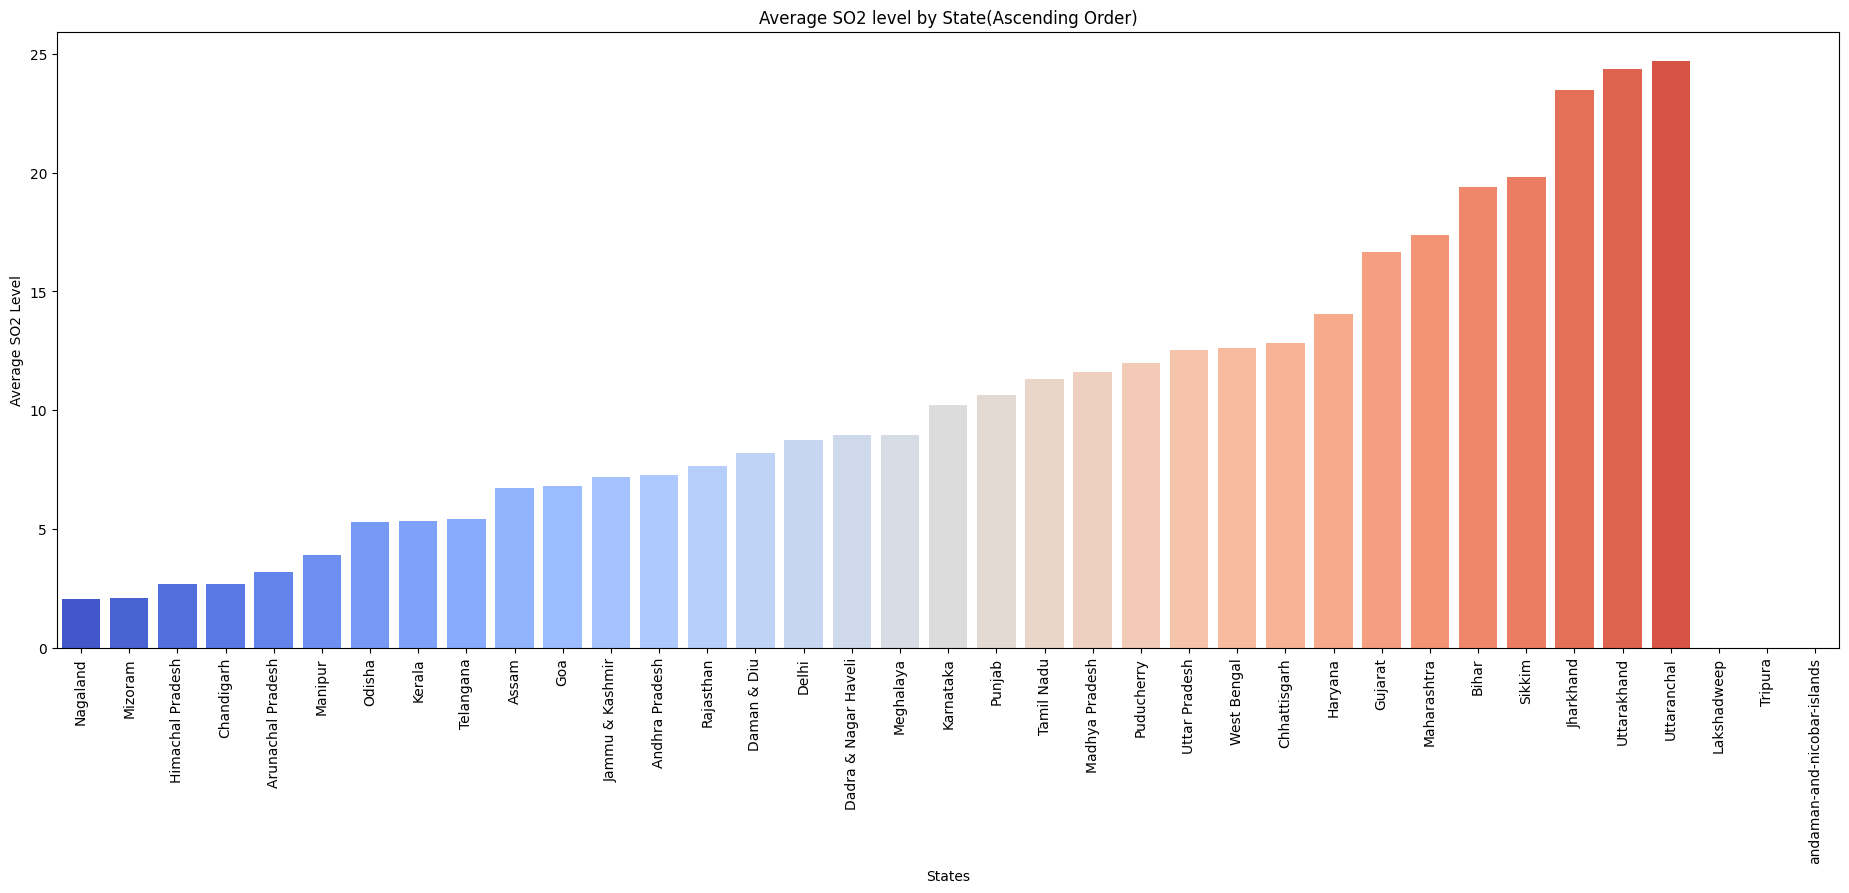

In [16]:
#checking so2 level in each state through bargraph
state_so2=df.groupby('state')['so2'].mean().reset_index()
state_so2=state_so2.sort_values(by='so2',ascending=True)
plt.figure(figsize=(23,8))
sns.barplot(x='state',y="so2",data=state_so2,palette='coolwarm',saturation=1)
plt.xticks(rotation=90)
plt.title("Average SO2 level by State(Ascending Order)")
plt.xlabel("States")
plt.ylabel("Average SO2 Level")
plt.show()

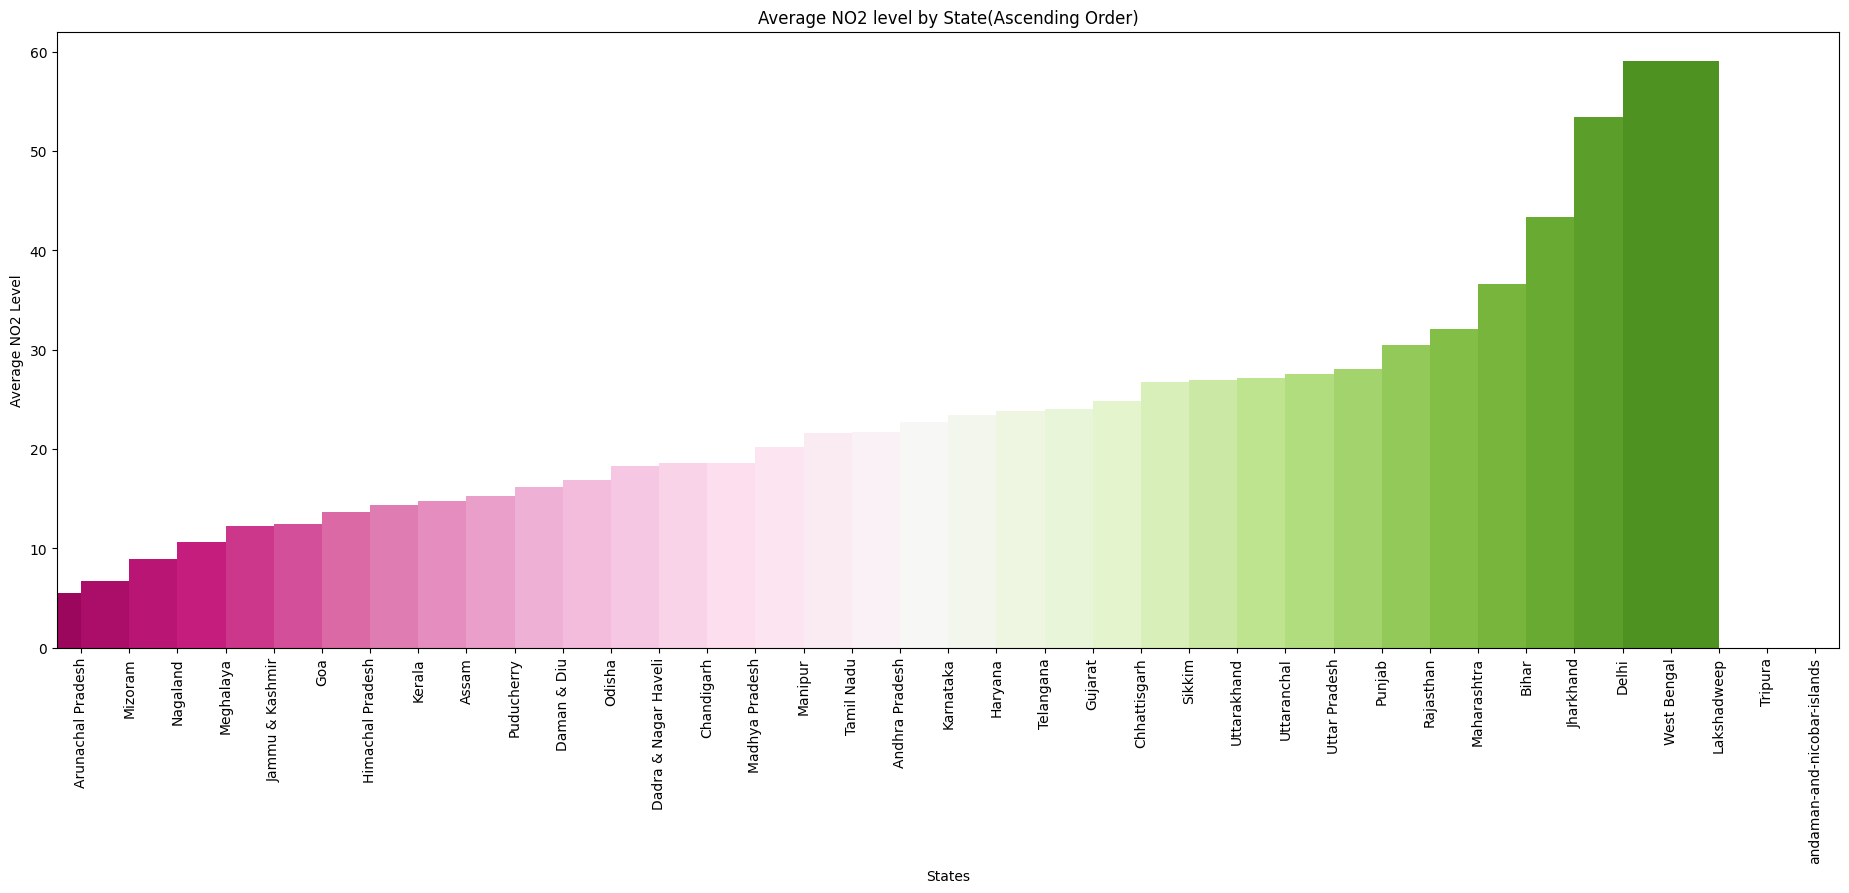

In [17]:
#checking no2 level in each state through bargraph
state_no2=df.groupby('state')['no2'].mean().reset_index()
state_no2=state_no2.sort_values(by='no2',ascending=True)
plt.figure(figsize=(23,8))
sns.barplot(x='state',y="no2",data=state_no2,palette='PiYG',saturation=1,width=2)
plt.xticks(rotation=90)
plt.title("Average NO2 level by State(Ascending Order)")
plt.xlabel("States")
plt.ylabel("Average NO2 Level")
plt.show()

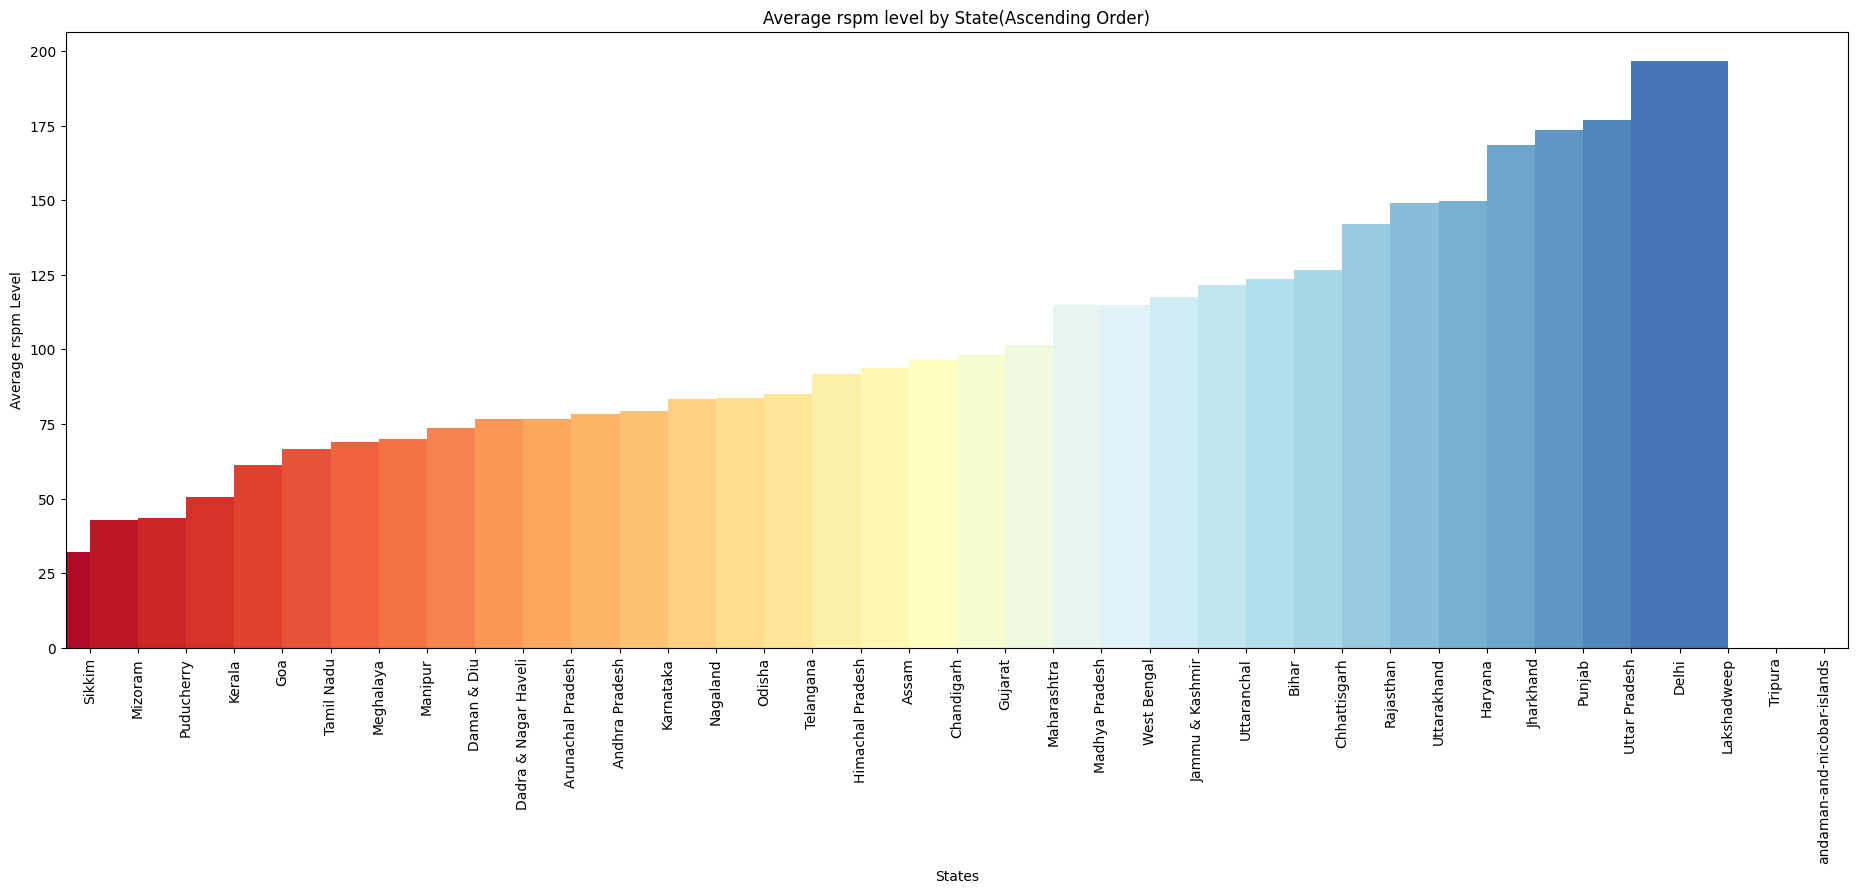

In [18]:
#checking rspm level in each state through bargraph
state_rspm=df.groupby('state')['rspm'].mean().reset_index()
state_rspm=state_rspm.sort_values(by='rspm',ascending=True)
plt.figure(figsize=(23,8))
sns.barplot(x='state',y="rspm",data=state_rspm,palette='RdYlBu',saturation=1,width=2)
plt.xticks(rotation=90)
plt.title("Average rspm level by State(Ascending Order)")
plt.xlabel("States")
plt.ylabel("Average rspm Level")
plt.show()

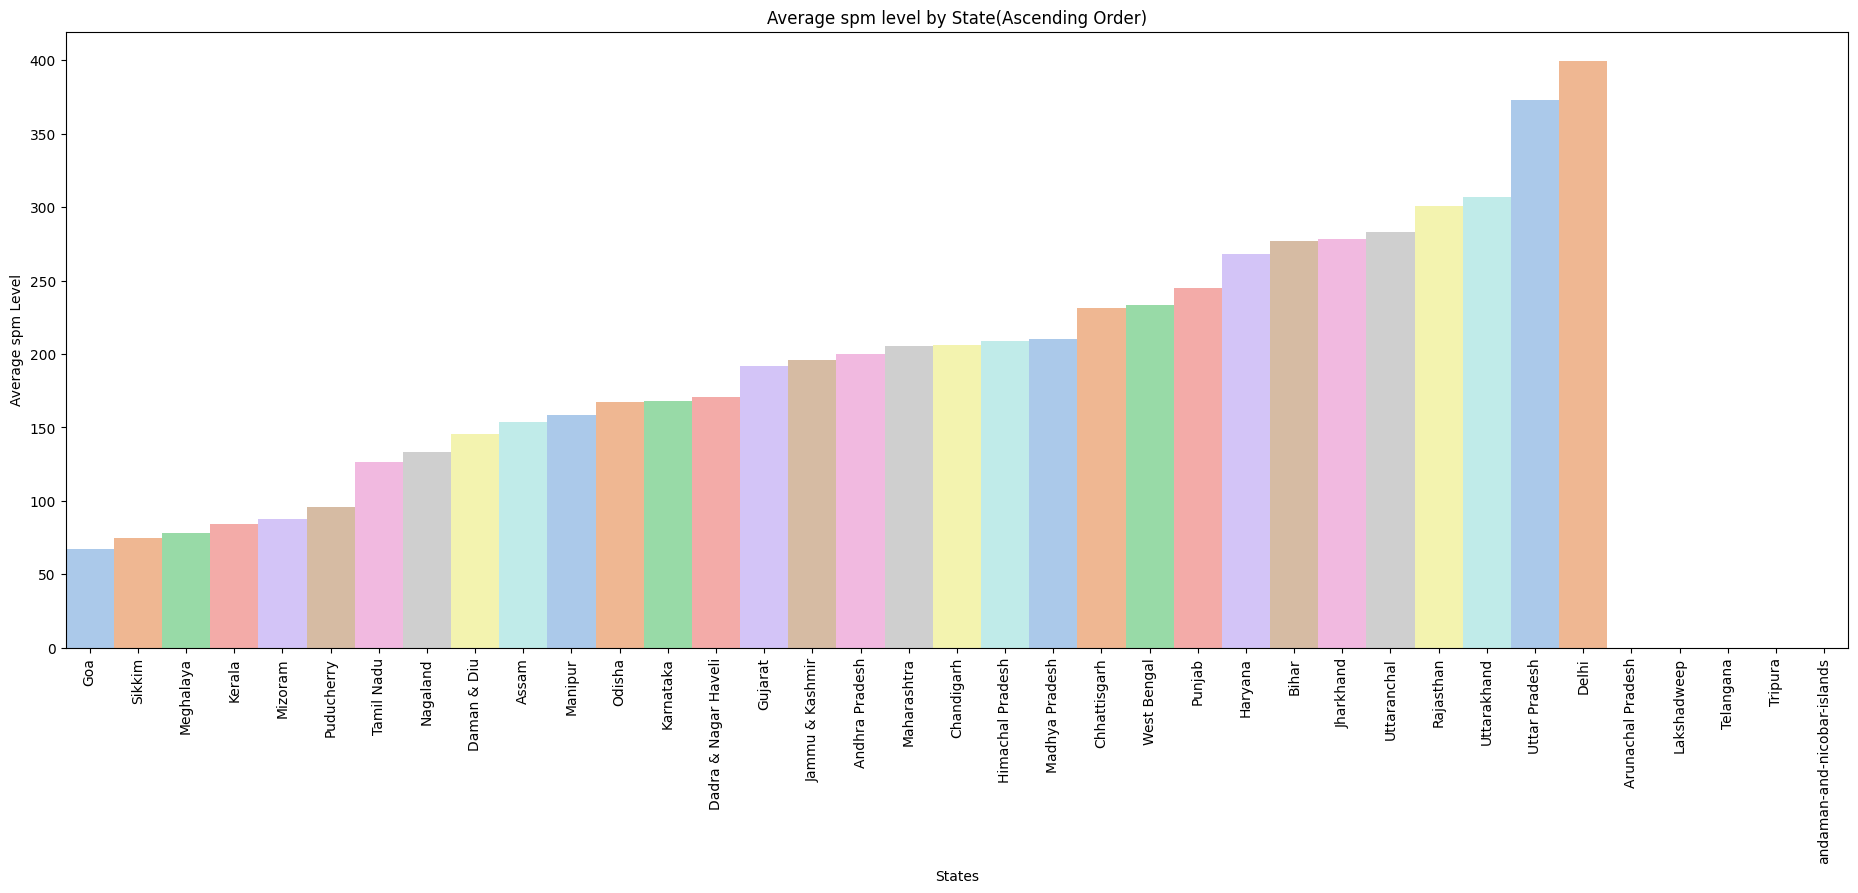

In [19]:
#checking spm level in each state through bargraph
state_spm=df.groupby('state')['spm'].mean().reset_index()
state_spm=state_spm.sort_values(by='spm',ascending=True)
plt.figure(figsize=(23,8))
sns.barplot(x='state',y="spm",data=state_spm,palette='pastel',width=1)
plt.xticks(rotation=90)
plt.title("Average spm level by State(Ascending Order)")
plt.xlabel("States")
plt.ylabel("Average spm Level")
plt.show()

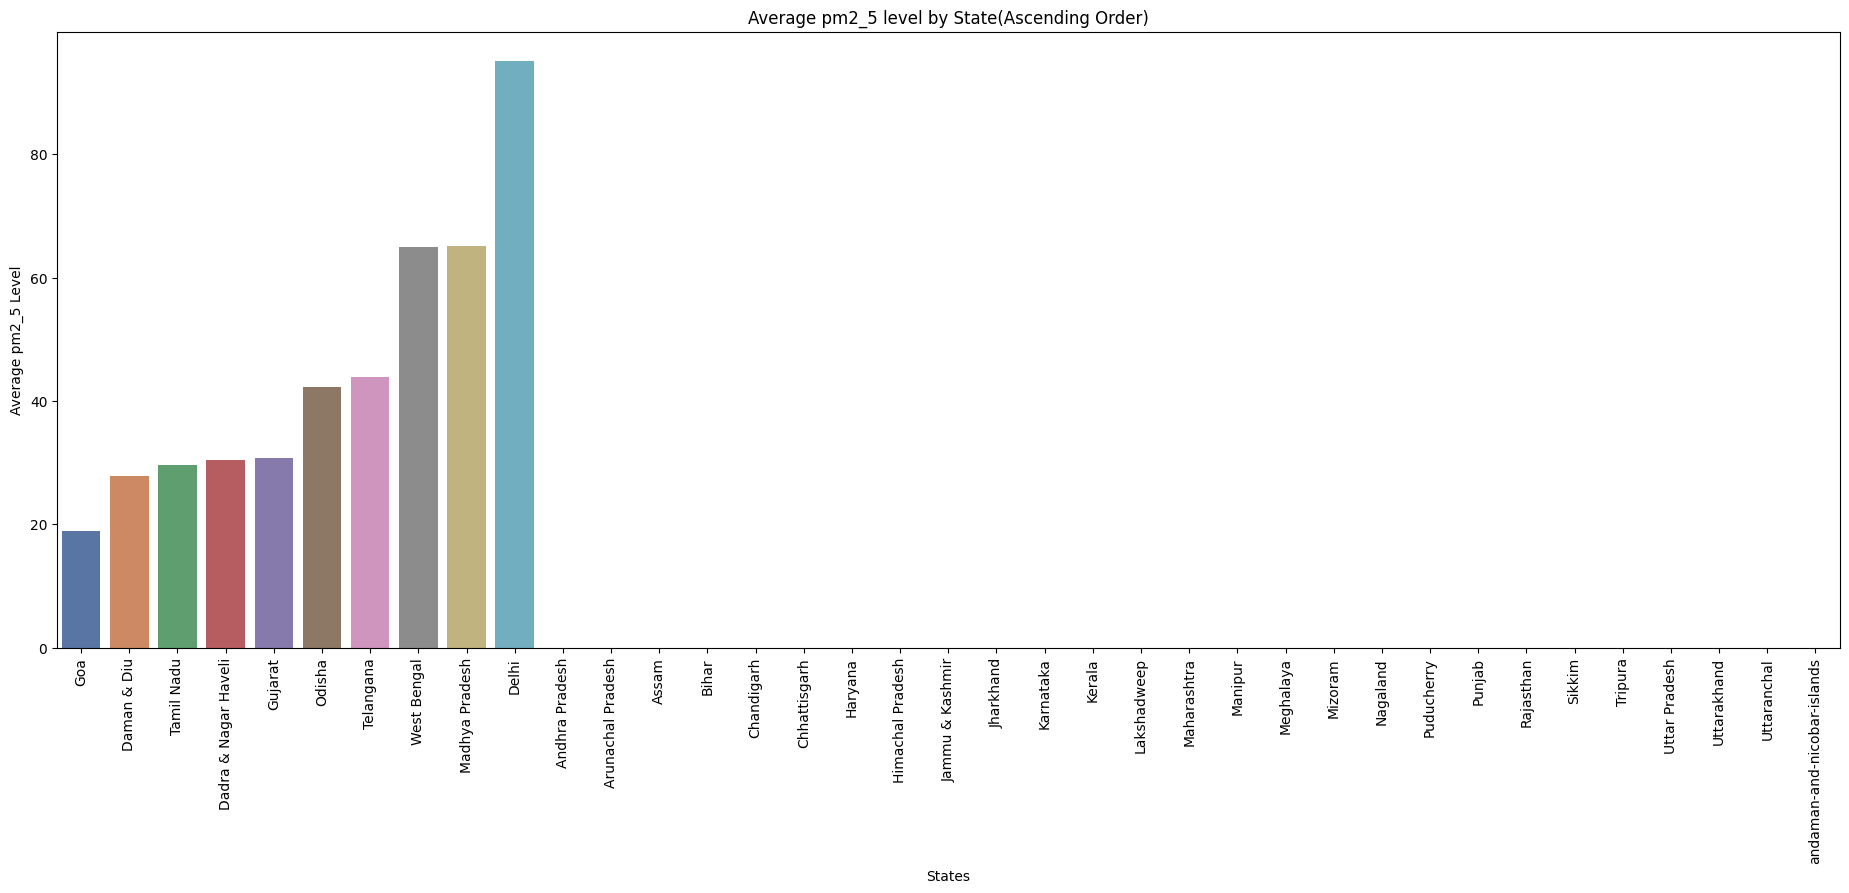

In [20]:
#checking pm2_5 level in each state through bargraph
state_pm2_5=df.groupby('state')['pm2_5'].mean().reset_index()
state_pm2_5=state_pm2_5.sort_values(by='pm2_5',ascending=True)
plt.figure(figsize=(23,8))
sns.barplot(x='state',y="pm2_5",data=state_pm2_5,palette='deep')
plt.xticks(rotation=90)
plt.title("Average pm2_5 level by State(Ascending Order)")
plt.xlabel("States")
plt.ylabel("Average pm2_5 Level")
plt.show()

## 6) Data Preprocessing

In [22]:
# Extracting important features from date column
df['date']=pd.to_datetime(df['date'],dayfirst=True,errors='coerce')
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df.head(5)

,state,so2,no2,rspm,spm,pm2_5,date,day,month,year
0,Andhra Pradesh,4.8,17.4,NaN,NaN,NaN,1990-02-01,1.0,2.0,1990.0
1,Andhra Pradesh,3.1,7.0,NaN,NaN,NaN,1990-02-01,1.0,2.0,1990.0
2,Andhra Pradesh,6.2,28.5,NaN,NaN,NaN,1990-02-01,1.0,2.0,1990.0
3,Andhra Pradesh,6.3,14.7,NaN,NaN,NaN,1990-03-01,1.0,3.0,1990.0
4,Andhra Pradesh,4.7,7.5,NaN,NaN,NaN,1990-03-01,1.0,3.0,1990.0


In [23]:
#checking null values
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

pm2_5    426428
spm      237387
rspm      40222
so2       34646
no2       16233
date          7
day           7
month         7
year          7
state         0
dtype: int64

In [24]:
# replace null values with 0
df.fillna(0,inplace=True)

In [25]:
# checking null values
df.isnull().sum()

state    0
so2      0
no2      0
rspm     0
spm      0
pm2_5    0
date     0
day      0
month    0
year     0
dtype: int64

In [26]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['States']=le.fit_transform(df['state'])

In [27]:
df.head(5)

,state,so2,no2,rspm,spm,pm2_5,date,day,month,year,States
0,Andhra Pradesh,4.8,17.4,0.0,0.0,0.0,1990-02-01 00:00:00,1.0,2.0,1990.0,0
1,Andhra Pradesh,3.1,7.0,0.0,0.0,0.0,1990-02-01 00:00:00,1.0,2.0,1990.0,0
2,Andhra Pradesh,6.2,28.5,0.0,0.0,0.0,1990-02-01 00:00:00,1.0,2.0,1990.0,0
3,Andhra Pradesh,6.3,14.7,0.0,0.0,0.0,1990-03-01 00:00:00,1.0,3.0,1990.0,0
4,Andhra Pradesh,4.7,7.5,0.0,0.0,0.0,1990-03-01 00:00:00,1.0,3.0,1990.0,0


In [28]:
# drop unnecessary column
df=df.drop(columns=["date","state"])

In [29]:
df.head(5)

,so2,no2,rspm,spm,pm2_5,day,month,year,States
0,4.8,17.4,0.0,0.0,0.0,1.0,2.0,1990.0,0
1,3.1,7.0,0.0,0.0,0.0,1.0,2.0,1990.0,0
2,6.2,28.5,0.0,0.0,0.0,1.0,2.0,1990.0,0
3,6.3,14.7,0.0,0.0,0.0,1.0,3.0,1990.0,0
4,4.7,7.5,0.0,0.0,0.0,1.0,3.0,1990.0,0


# CALCULATE AIR QUALITY INDEX 
The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used: I=IHI-ILO/BPHI-BPLO*(C−BPLO​)+ILO​


### Function to calculate so2 individual pollutant index(si)

In [32]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head(4)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875


### Function to calculate no2 individual pollutant index(ni)

In [34]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head(4)

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375


## Function to calculate rspm individual pollutant index(rpi)

In [36]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head(4)

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0


### Function to calculate spm individual pollutant index(spi)

In [38]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head(4)


,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0


### Function to calculate PM2_5i individual pollutant index(spi)

In [40]:
def cal_PM2_5i(pm2_5):
    pm2_5i=0
    if(pm2_5<=30):
     pm2_5i=pm2_5*50/50
    elif(pm2_5>30 and pm2_5<=60):
     pm2_5i=50+(pm2_5-30)*(50/30)
    elif(pm2_5>60 and pm2_5<=90):
     pm2_5i= 100+(pm2_5-60)*(100/30)
    elif(pm2_5>90 and pm2_5<=120):
     pm2_5i=200+(pm2_5-90)*(100/30)
    elif(pm2_5>120 and pm2_5<=250):
     pm2_5i=300+(pm2_5-120)*(100/130)
    elif(pm2_5>250 and pm2_5<=400):
     pm2_5i=400+(pm2_5-250)*(100/150)
    else:
     pm2_5i=500+(pm2_5-400)*(100/400)
    return pm2_5i
   
df['PM2_5i']=df['pm2_5'].apply(cal_PM2_5i)
data= df[['pm2_5','PM2_5i']]
data.head(4)

,pm2_5,PM2_5i
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0


### function to calculate the air quality index (AQI) of every data value

In [42]:
def cal_aqi(si,ni,rspmi,spmi,pm2_5i):
    aqi=0
    if(si>ni and si>rspmi and si>spmi and si>pm2_5i):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi and ni>pm2_5i):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi and rspmi>pm2_5i):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi and spmi>pm2_5i):
     aqi=spmi
    if(pm2_5i>si and pm2_5i>ni and pm2_5i>rspmi and pm2_5i>spmi):
     aqi=pm2_5i
    return aqi
df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi'],x['PM2_5i']),axis=1)
df= df[['States','day','month','year','SOi','Noi','Rpi','SPMi','PM2_5i','AQI']]
df.head(4)

,States,day,month,year,SOi,Noi,Rpi,SPMi,PM2_5i,AQI
0,0,1.0,2.0,1990.0,6.000,21.750,0.0,0.0,0.0,21.750
1,0,1.0,2.0,1990.0,3.875,8.750,0.0,0.0,0.0,8.750
2,0,1.0,2.0,1990.0,7.750,35.625,0.0,0.0,0.0,35.625
3,0,1.0,3.0,1990.0,7.875,18.375,0.0,0.0,0.0,18.375


### Function to calculate aqi range

In [44]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head(4)

,States,day,month,year,SOi,Noi,Rpi,SPMi,PM2_5i,AQI,AQI_Range
0,0,1.0,2.0,1990.0,6.000,21.750,0.0,0.0,0.0,21.750,Good
1,0,1.0,2.0,1990.0,3.875,8.750,0.0,0.0,0.0,8.750,Good
2,0,1.0,2.0,1990.0,7.750,35.625,0.0,0.0,0.0,35.625,Good
3,0,1.0,3.0,1990.0,7.875,18.375,0.0,0.0,0.0,18.375,Good


## 7) Building Regression Models

In [46]:
# Splitting the dataset into Dependent and Independent columns
X=df[['States','SOi','Noi','Rpi','SPMi','PM2_5i','day','year','month']]
Y=df['AQI']

In [47]:
df.head(5)

,States,day,month,year,SOi,Noi,Rpi,SPMi,PM2_5i,AQI,AQI_Range
0,0,1.0,2.0,1990.0,6.000,21.750,0.0,0.0,0.0,21.750,Good
1,0,1.0,2.0,1990.0,3.875,8.750,0.0,0.0,0.0,8.750,Good
2,0,1.0,2.0,1990.0,7.750,35.625,0.0,0.0,0.0,35.625,Good
3,0,1.0,3.0,1990.0,7.875,18.375,0.0,0.0,0.0,18.375,Good
4,0,1.0,3.0,1990.0,5.875,9.375,0.0,0.0,0.0,9.375,Good


In [48]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(348593, 9) (87149, 9) (348593,) (87149,)


## a) Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,Y_train)
train_pred=model1.predict(X_train)
test_pred=model1.predict(X_test)
from sklearn import metrics
#checking the r2 score on training and testing data
from sklearn.metrics import r2_score
print("r2 score on training data:",r2_score(Y_train,train_pred))
print("r2 score on testing data:",r2_score(Y_test,test_pred))
# Data Prediction
model1.predict([[0,1.0,2.0,1990.0,6.000,21.750,0.0,0.0,0.0]])

r2 score on training data: 0.9849532216974585
r2 score on testing data: 0.9846990018242954


array([-296.80593199])

## b)Decision Tree Regression

In [53]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(random_state=70)
DT.fit(X_train,Y_train)
train_pred=DT.predict(X_train)
test_pred=DT.predict(X_test)
from sklearn import metrics
#checking the r2 score on training and testing data
from sklearn.metrics import r2_score
print("r2 score on training data:",r2_score(Y_train,train_pred))
print("r2 score on testing data:",r2_score(Y_test,test_pred))
# Data Prediction
DT.predict([[0,1.0,2.0,1990.0,6.000,21.750,0.0,0.0,0.0]])


r2 score on training data: 1.0
r2 score on testing data: 0.9997636026711771


array([22.])

## 8) Build Classification models

In [55]:
# Splitting the dataset into Dependent and Independent columns
X2 = df[['States','SOi','Noi','Rpi','SPMi','day','month','year','PM2_5i']]
Y2 = df['AQI_Range'] 

In [56]:
df["AQI_Range"].value_counts()

AQI_Range
Good              215447
Poor               94149
Moderate           59305
Unhealthy          32082
Hazardous          18722
Very unhealthy     16037
Name: count, dtype: int64

In [57]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)

## (a) Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train2,Y_train2)
train_preds2=log_reg.predict(X_train2)
test_preds2=log_reg.predict(X_test2)
from sklearn import metrics
#checking the accuracy on training and testing data
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy on training data:",accuracy_score(Y_train2,train_preds2))
print("Accuracy on testing data:",accuracy_score(Y_test2,test_preds2))
#Data Prediction
log_reg.predict([[0,1.0,2.0,1990.0,6.000,21.750,0.0,0.0,0.0]])

Accuracy on training data: 0.9354266356564719
Accuracy on testing data: 0.9349142877012413


array(['Hazardous'], dtype=object)

## (b) K-Nearest Neighbour

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X2)
X2=pd.DataFrame(sc.transform(X2),columns=X2.columns)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2,Y_train2)
train_preds2=knn.predict(X_train2)
test_preds2=knn.predict(X_test2)
from sklearn import metrics
#checking the accuracy on training and testing data
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy on training data:",accuracy_score(Y_train2,train_preds2))
print("Accuracy on testing data:",accuracy_score(Y_test2,test_preds2))
# Data Prediction
knn.predict([[0,1.0,2.0,1990.0,6.000,21.750,0.0,0.0,0.0]])

Accuracy on training data: 0.9943928178744772
Accuracy on testing data: 0.9902917347612921


array(['Good'], dtype=object)

## (9) Model comparison and visualisation

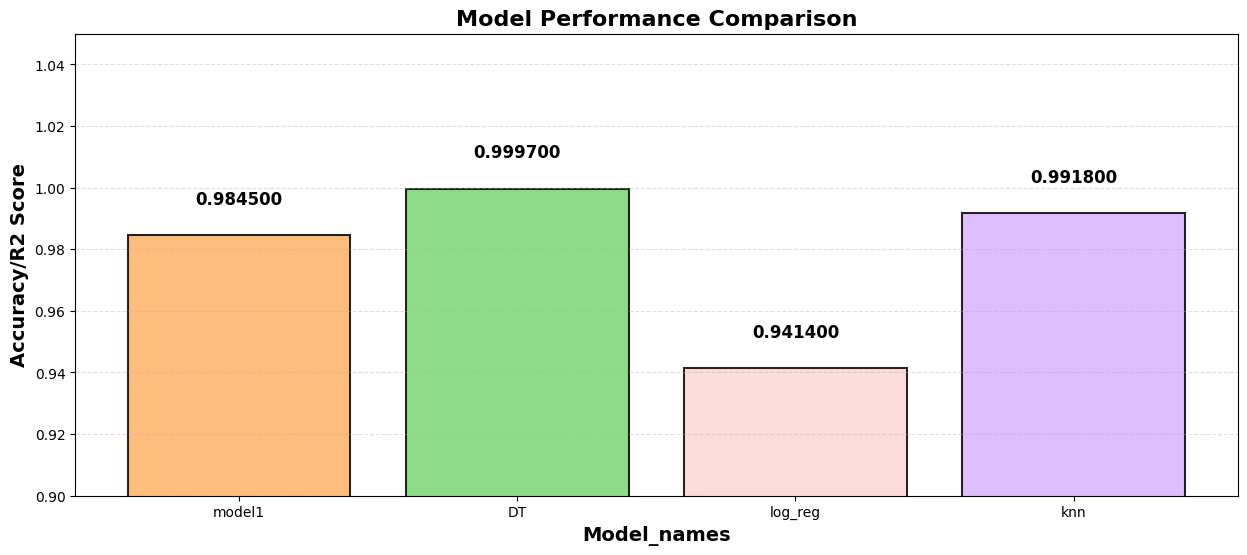

In [63]:
#Visualising the scores an accuracy achieved by regression and classification models through bar graph
Model_names=['model1','DT','log_reg','knn']
Scores=[0.9845,0.9997,0.9414,0.9918]
colors=["#ffb266","#7ad673","#ffd6d6","#d9b3ff"]
plt.figure(figsize=(15,6))
bars=plt.bar(Model_names,Scores,color=colors,edgecolor="black",linewidth=1.5,alpha=0.85)
for i,v in enumerate(Scores):
    plt.text(i,v+0.01,f"{v:4f}",ha="center",fontsize=12,fontweight='bold')
plt.xlabel('Model_names',fontsize=14,fontweight='bold')
plt.ylabel('Accuracy/R2 Score',fontsize=14,fontweight='bold')
plt.title('Model Performance Comparison',fontsize=16,fontweight='bold')
plt.grid(axis='y',linestyle='--',alpha=0.4)
plt.ylim(0.9,1.05)
plt.show()

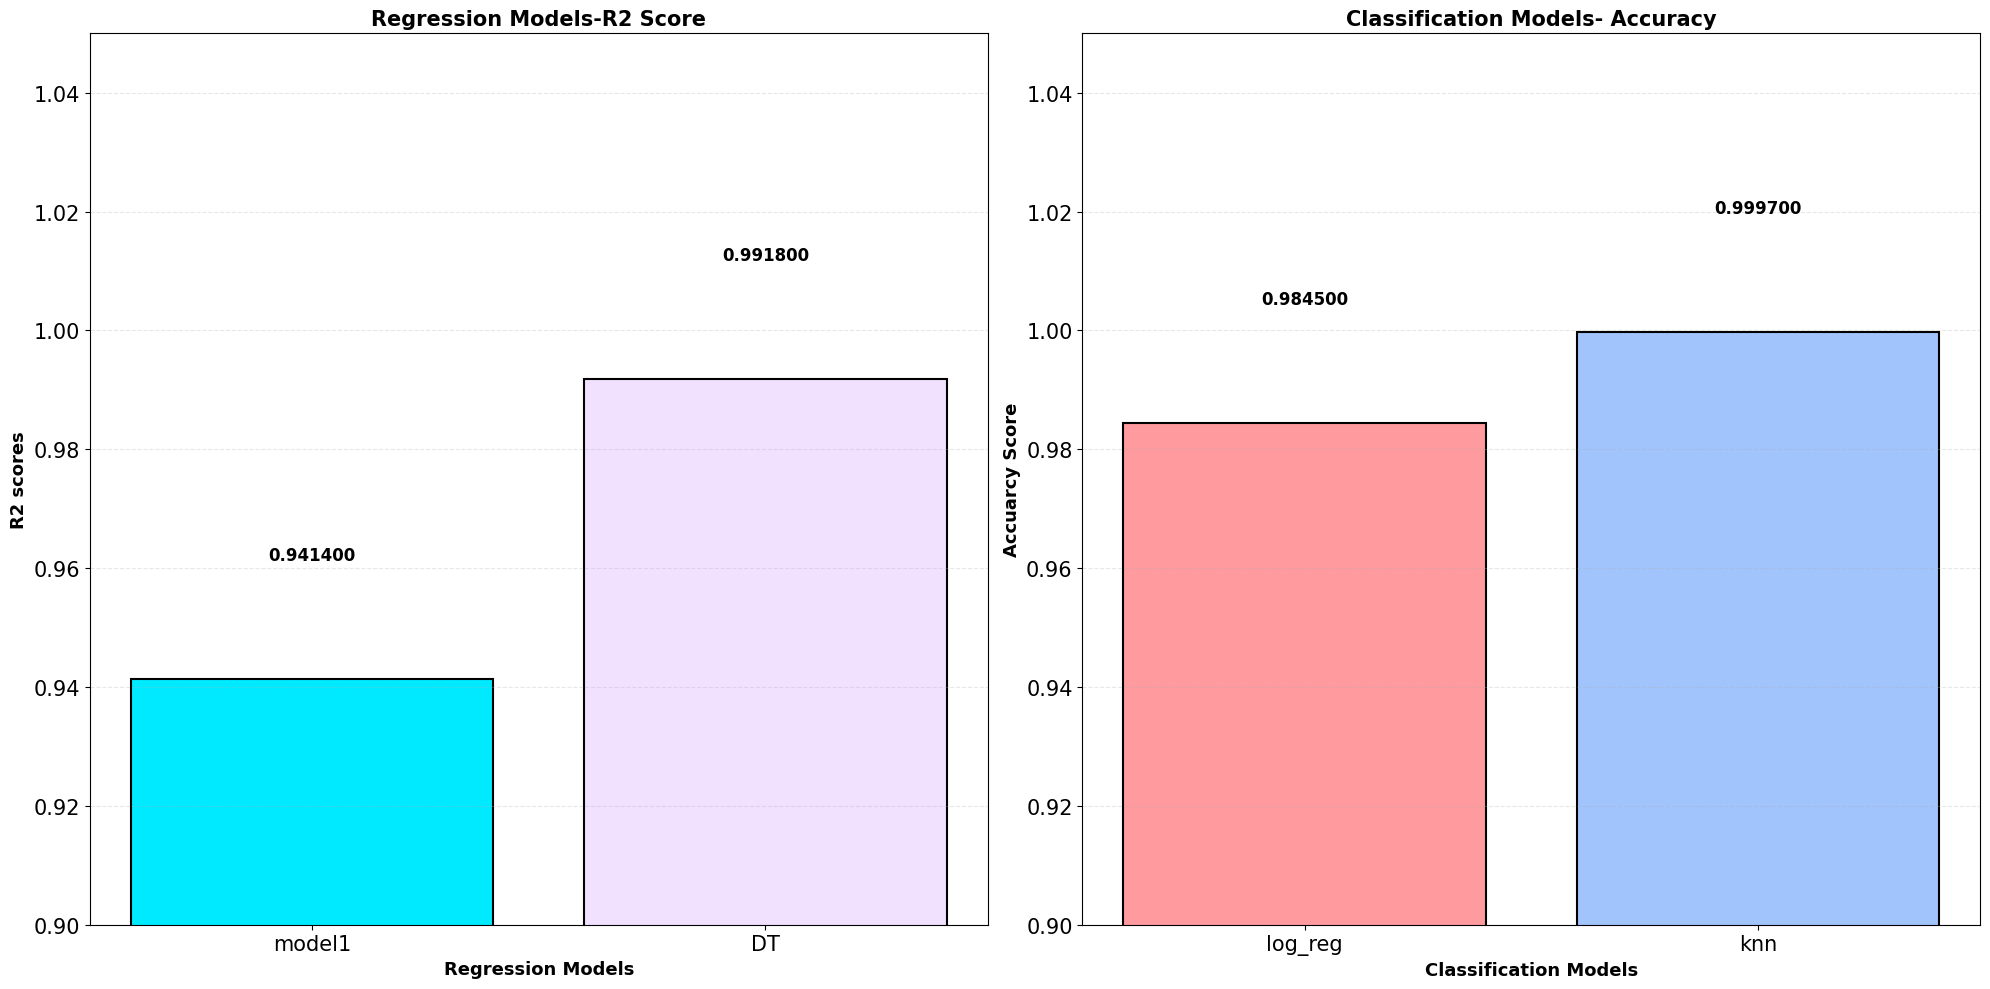

In [64]:
## Visualising the scores and accuracy achieved by regression and classification models through subplot
Regression_models=['model1','DT']
Classification_models=['log_reg','knn']
accuracy_scores=[0.9845,0.9997]
r2_scores=[0.9414,0.9918]
regression_colors=["#00eaff","#f2e0ff"]
classification_colors=["#ff9a9e","#a1c4fd"]
fig,axes=plt.subplots(1,2,figsize=(20,10))
bars1=axes[0].bar(Regression_models,r2_scores,color=regression_colors,edgecolor='black',linewidth=1.5)
axes[0].set_title("Regression Models-R2 Score",fontsize=15,fontweight='bold')
axes[0].set_xlabel('Regression Models',fontsize=13,fontweight='bold')
axes[0].set_ylabel('R2 scores',fontsize=13,fontweight='bold')
axes[0].set_ylim(0.9,1.05)
axes[0].tick_params(axis='y',labelsize=15)
axes[0].tick_params(axis='x',labelsize=15)
for i,v in enumerate(r2_scores):
    axes[0].text(i,v+0.02,f"{v:2f}",ha='center',fontsize=12,fontweight='bold')
axes[0].grid(axis='y',linestyle='--',alpha=0.3)
bars2=axes[1].bar(Classification_models,accuracy_scores,color=classification_colors,edgecolor='black',linewidth=1.5)
axes[1].set_title("Classification Models- Accuracy",fontsize=15,fontweight='bold')
axes[1].set_xlabel('Classification Models',fontsize=13,fontweight='bold')
axes[1].set_ylabel("Accuarcy Score",fontsize=13,fontweight='bold')
axes[1].set_ylim(0.9,1.05)
axes[1].tick_params(axis='y',labelsize=15)
axes[1].tick_params(axis='x',labelsize=15)
for i,v in enumerate(accuracy_scores):
    axes[1].text(i,v+0.02,f"{v:2f}",ha='center',fontsize=12,fontweight='bold')
axes[1].grid(axis='y',linestyle='--',alpha=0.3)
plt.tight_layout()
plt.show()